# Notebook For Training Character Recognition

### Datasets :
#### 1. Digits (0-9) : MNIST (28 * 28)
#### 2. Symbols ( ‘(’ , ‘)’, ‘-’, ‘+’, ‘*’ ): Kaggle Handwritten Mathematical Symbols Dataset (45 * 45)

### Preprocessing of symbols to match MNIST digits :
Converted to Binary 

Padded to 20 * 20 (preserving the aspect ratio)

Padded to 28 * 28 using Centre of mass

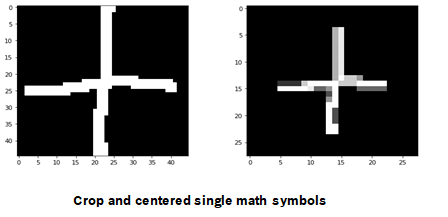

In [1]:
import tensorflow as tf

C:\Program Files\Anaconda3\lib\site-packages\requests\__init__.py:80: RequestsDependencyWarning: urllib3 (1.23) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [9]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm  
import keras
import math
from scipy import ndimage

Using TensorFlow backend.


### Defining Image Directory

In [11]:
train_dir = "C:/Users/DMV4KOR/Desktop/Output2/"

### Data : Collecting images

In [4]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

     
train_datagen = ImageDataGenerator(rescale=1./255,
    
    data_format='channels_first',
    validation_split=0.2) 

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(28, 28),
    color_mode = "grayscale",
    batch_size=20,
    shuffle = True,
    classes = ['0','1','2','3','4','5','6','7','8','9','+','-','times','(',')'],
    class_mode="sparse",
    subset='training') 

validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(28, 28),
    color_mode = "grayscale",
    batch_size=20,
    shuffle = True,
    classes = ['0','1','2','3','4','5','6','7','8','9','+','-','times','(',')'],
    class_mode="sparse",
    subset='validation') 

Found 52205 images belonging to 15 classes.
Found 13046 images belonging to 15 classes.


 # Model

In [11]:
import keras
keras.backend.set_image_data_format('channels_first')

## ------------------------------------------Deep Learning Model : DCCNN-------------------------------------------

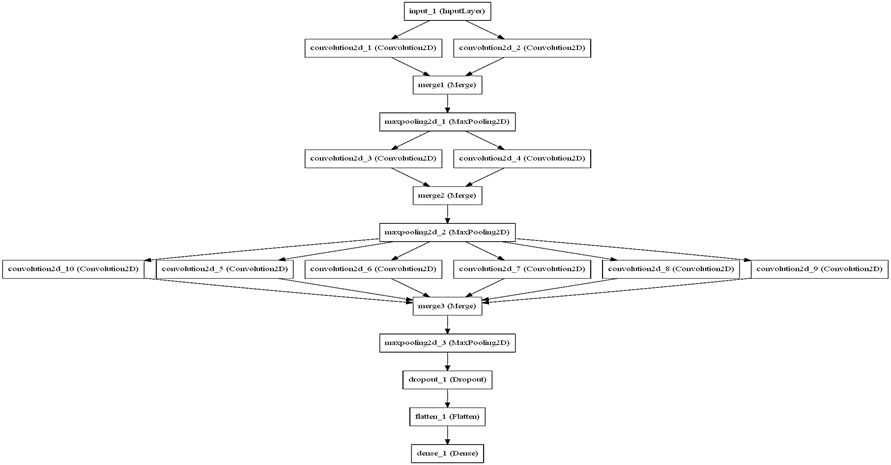

In [12]:
from keras.layers import merge, Input, concatenate
from keras.models import Model
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import MaxPooling2D, Convolution2D
img_rows, img_cols = 28, 28

nb_filters_1 = 64
nb_filters_2 = 128
nb_filters_3 = 256
nb_conv = 3
nb_conv_mid = 4
nb_conv_init = 5

init = Input(shape=(1, 28, 28),)

fork11 = Convolution2D(nb_filters_1, nb_conv_init, nb_conv_init,  activation="relu", border_mode='same')(init)
fork12 = Convolution2D(nb_filters_1, nb_conv_init, nb_conv_init, activation="relu", border_mode='same')(init)
merge1 = concatenate([fork11, fork12], axis=1, name='merge1')
# concat_feat = concatenate([concat_feat, x], mode='concat', axis=concat_axis, name='concat_'+str(stage)+'_'+str(branch))
maxpool1 = MaxPooling2D(strides=(2,2), border_mode='same')(merge1)

fork21 = Convolution2D(nb_filters_2, nb_conv_mid, nb_conv_mid, activation="relu", border_mode='same')(maxpool1)
fork22 = Convolution2D(nb_filters_2, nb_conv_mid, nb_conv_mid, activation="relu", border_mode='same')(maxpool1)
merge2 = concatenate([fork21, fork22, ], axis=1, name='merge2')
maxpool2 = MaxPooling2D(strides=(2,2), border_mode='same')(merge2)

fork31 = Convolution2D(nb_filters_3, nb_conv, nb_conv, activation="relu", border_mode='same')(maxpool2)
fork32 = Convolution2D(nb_filters_3, nb_conv, nb_conv, activation="relu", border_mode='same')(maxpool2)
fork33 = Convolution2D(nb_filters_3, nb_conv, nb_conv, activation="relu", border_mode='same')(maxpool2)
fork34 = Convolution2D(nb_filters_3, nb_conv, nb_conv, activation="relu", border_mode='same')(maxpool2)
fork35 = Convolution2D(nb_filters_3, nb_conv, nb_conv, activation="relu", border_mode='same')(maxpool2)
fork36 = Convolution2D(nb_filters_3, nb_conv, nb_conv, activation="relu", border_mode='same')(maxpool2)
merge3 = concatenate([fork31, fork32, fork33, fork34, fork35, fork36, ], axis=1, name='merge3')
maxpool3 = MaxPooling2D(strides=(2,2), border_mode='same')(merge3)

dropout = Dropout(0.5)(maxpool3)

flatten = Flatten()(dropout)
output = Dense(15, activation="softmax")(flatten)

model = Model(input=init, output=output)

model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 1, 28, 28)    0                                            
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 64, 28, 28)   1664        input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_22 (Conv2D)              (None, 64, 28, 28)   1664        input_3[0][0]                    
__________________________________________________________________________________________________
merge1 (Concatenate)            (None, 128, 28, 28)  0           conv2d_21[0][0]                  
                                                                 conv2d_22[0][0]            

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), activation="relu", padding="same")`
  app.launch_new_instance()
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), activation="relu", padding="same")`
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(strides=(2, 2), padding="same")`
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (4, 4), activation="relu", padding="same")`
C:\Program Files\Anaconda3\lib\site-package

In [13]:
from keras import optimizers
ada = keras.optimizers.Adadelta(learning_rate=1.0, rho=0.95)
model.compile(optimizer=ada,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit_generator(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              validation_steps=100,
                              epochs=10)

Epoch 1/10
100/100 [==============================] - 40s 396ms/step - loss: 0.6996 - accuracy: 0.8945 - val_loss: 0.2604 - val_accuracy: 0.9485
Epoch 2/10
100/100 [==============================] - 39s 387ms/step - loss: 0.2099 - accuracy: 0.9265 - val_loss: 0.1137 - val_accuracy: 0.9305
Epoch 3/10
100/100 [==============================] - 41s 410ms/step - loss: 0.2099 - accuracy: 0.9305 - val_loss: 0.0928 - val_accuracy: 0.9560
Epoch 4/10
100/100 [==============================] - 42s 421ms/step - loss: 0.1627 - accuracy: 0.9435 - val_loss: 0.0488 - val_accuracy: 0.9495
Epoch 5/10
100/100 [==============================] - 39s 394ms/step - loss: 0.1631 - accuracy: 0.9520 - val_loss: 0.1016 - val_accuracy: 0.9615
Epoch 6/10
100/100 [==============================] - 39s 391ms/step - loss: 0.1216 - accuracy: 0.9630 - val_loss: 0.0193 - val_accuracy: 0.9750
Epoch 7/10
100/100 [==============================] - 39s 387ms/step - loss: 0.1241 - accuracy: 0.9665 - val_loss: 0.0561 - val_ac

## Validation Accuracy [10th Epoch] : ~97%

In [13]:
model.save('C:/Users/DMV4KOR/Desktop/models/DCNN_10AD_sy.h5')

W1030 16:37:21.585665 19176 deprecation.py:506] From C:\Program Files\Anaconda3\lib\site-packages\tensorflow_core\python\ops\resource_variable_ops.py:1630: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
W1030 16:37:21.960668 19176 module_wrapper.py:139] From C:\Program Files\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1030 16:37:22.952564 19176 module_wrapper.py:139] From C:\Program Files\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.

